In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

A reminder of the business problem we are trying to solve: Too many premier league clubs or clubs around the world in general overpay on player wages, sometimes there is no control over player's market value and what you are willing to pay. But something you definitely have control over is the negotiating of a player's wage. 
The regression model built solves this issue and will take into account, players' attributes, perfomances of the previous season and market value to ensure that you are paying the right quality of player, the money they deserve.

### BUSINESS QUESTIONS

In [2]:
exp_data = pd.read_csv("explore_data.csv")

In [53]:
exp_data[exp_data['full_name'] == 'Bruno Miguel Borges Fernandes']

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
3351,Bruno Miguel Borges Fernandes,25,Liga NOS,2018/2019,Midfielder,Sporting CP,2943,1440,1503,Portugal,33,16,17,20,10,10,13,9,4,6,0,10,8,2,29,12,17,9,0,1.01,0.4,0.61,0.63,0.6,147,0.89,101,89,327,226,0.28,12,4,-1,1,24000,49000000


In [3]:
exp_data.head(16)

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
0,De Gea,29,Premier League,2018/2019,Goalkeeper,Manchester United,3420,1710,1710,Spain,...,90,3420,0,0.03,310,419,90,18,200000,56000000
1,Matteo Darmian,30,Premier League,2018/2019,Defender,Manchester United,443,353,90,Italy,...,74,0,0,0.00,411,366,102,25,36000,5500000
2,Victor Nilsson Lindelöf,25,Premier League,2018/2019,Defender,Manchester United,2602,1112,1490,Sweden,...,87,2602,2602,0.03,263,249,88,14,97000,22000000
3,Luke Shaw,24,Premier League,2018/2019,Defender,Manchester United,2592,1170,1422,England,...,89,236,648,0.38,262,104,79,13,90000,16500000
4,Eric Bertrand Bailly,25,Premier League,2018/2019,Defender,Manchester United,637,349,288,Côte d'Ivoire,...,53,319,0,0.28,340,271,142,26,100000,16500000
5,Juan Mata,31,Premier League,2018/2019,Midfielder,Manchester United,1294,833,461,Spain,...,59,431,647,0.21,91,100,0,6,125000,15500000
6,Paul Pogba,26,Premier League,2018/2019,Midfielder,Manchester United,3011,1517,1494,France,...,86,502,335,0.18,35,30,0,1,250000,72500000
7,Frederico Rodrigues Santos,26,Premier League,2018/2019,Midfielder,Manchester United,1045,577,468,Brazil,...,61,523,1045,0.17,169,163,0,12,120000,18000000
8,Andreas Pereira,23,Premier League,2018/2019,Midfielder,Manchester United,595,521,74,Brazil,...,40,119,595,0.76,120,91,0,16,75000,10500000
9,Marcus Rashford,22,Premier League,2018/2019,Forward,Manchester United,2362,1293,1069,England,...,72,472,394,0.19,40,49,0,3,120000,35500000


In [4]:
exp_data['league'].value_counts()

Championship      659
Premier League    517
Serie A           484
Ligue 1           473
Bundesliga        473
La Liga           438
Eredivisie        297
Liga NOS          181
Name: league, dtype: int64

In [5]:
exp_data.columns

Index(['full_name', 'age', 'league', 'season', 'position', 'current_club',
       'minutes_played_overall', 'minutes_played_home', 'minutes_played_away',
       'nationality', 'appearances_overall', 'appearances_home',
       'appearances_away', 'goals_overall', 'goals_home', 'goals_away',
       'assists_overall', 'assists_home', 'assists_away', 'penalty_goals',
       'penalty_misses', 'clean_sheets_overall', 'clean_sheets_home',
       'clean_sheets_away', 'conceded_overall', 'conceded_home',
       'conceded_away', 'yellow_cards_overall', 'red_cards_overall',
       'goals_involved_per_90_overall', 'assists_per_90_overall',
       'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_league_top_attackers', 'rank_in_league_top_midfielders',
       'rank_in_league_top_

In [6]:
exp_data

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
0,De Gea,29,Premier League,2018/2019,Goalkeeper,Manchester United,3420,1710,1710,Spain,...,90,3420,0,0.03,310,419,90,18,200000,56000000
1,Matteo Darmian,30,Premier League,2018/2019,Defender,Manchester United,443,353,90,Italy,...,74,0,0,0.00,411,366,102,25,36000,5500000
2,Victor Nilsson Lindelöf,25,Premier League,2018/2019,Defender,Manchester United,2602,1112,1490,Sweden,...,87,2602,2602,0.03,263,249,88,14,97000,22000000
3,Luke Shaw,24,Premier League,2018/2019,Defender,Manchester United,2592,1170,1422,England,...,89,236,648,0.38,262,104,79,13,90000,16500000
4,Eric Bertrand Bailly,25,Premier League,2018/2019,Defender,Manchester United,637,349,288,Côte d'Ivoire,...,53,319,0,0.28,340,271,142,26,100000,16500000
5,Juan Mata,31,Premier League,2018/2019,Midfielder,Manchester United,1294,833,461,Spain,...,59,431,647,0.21,91,100,0,6,125000,15500000
6,Paul Pogba,26,Premier League,2018/2019,Midfielder,Manchester United,3011,1517,1494,France,...,86,502,335,0.18,35,30,0,1,250000,72500000
7,Frederico Rodrigues Santos,26,Premier League,2018/2019,Midfielder,Manchester United,1045,577,468,Brazil,...,61,523,1045,0.17,169,163,0,12,120000,18000000
8,Andreas Pereira,23,Premier League,2018/2019,Midfielder,Manchester United,595,521,74,Brazil,...,40,119,595,0.76,120,91,0,16,75000,10500000
9,Marcus Rashford,22,Premier League,2018/2019,Forward,Manchester United,2362,1293,1069,England,...,72,472,394,0.19,40,49,0,3,120000,35500000


## BUSINESS QUESTIONS (FOOTBALL TRANSFERS)

This set of business questions will take on a hypothetical scenario of the data science company representing one of the top clubs, for example Manchester United, Liverpool, Chelsea, Real Madrid etc...

#### Q1. Chelsea has approcahed the business, as they are in the need of top 10 defenders in the premier league that have high goal involvement ratio per 90 minutes and have played over 2000 minutes in 2018/2019 season

The reason why Chelsea FC have gone for 2000 minutes(at least 22 games) is because they want a player that is not injury prone, plays consistently and can contribute goals from the back either by making or scoring the goals

In [7]:
chelsea_data = exp_data[(exp_data['position'] == 'Defender') & 
                        (exp_data['league'] == 'Premier League') 
                         & (exp_data['minutes_played_overall'] > 2000)]

In [8]:
scout_chelsea = chelsea_data.sort_values('goals_involved_per_90_overall').tail(10)

In [9]:
scout_chelsea

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
294,Aymeric Laporte,25,Premier League,2018/2019,Defender,Manchester City,3057,1526,1531,France,...,87,1019,1019,0.09,171,158,14,9,190000,56500000
79,Souleymane Bamba,34,Premier League,2018/2019,Defender,Cardiff City,2475,1260,1215,Côte d'Ivoire,...,88,354,2475,0.25,119,233,136,4,25000,2500000
139,Marcos Alonso,28,Premier League,2018/2019,Defender,Chelsea,2761,1338,1423,Spain,...,89,460,690,0.20,202,108,22,10,110000,15000000
41,Fabian Schär,27,Premier League,2018/2019,Defender,Newcastle United,2002,1173,829,Switzerland,...,83,167,2002,0.54,108,226,23,3,46000,15500000
3392,Ricardo Domingos Barbosa Pereira,26,Premier League,2018/2019,Defender,Leicester City,3125,1526,1599,Portugal,...,89,446,521,0.20,206,84,53,7,96000,33000000
207,Lucas Digne,26,Premier League,2018/2019,Defender,Everton,2990,1511,1479,France,...,85,427,748,0.21,142,128,43,5,97000,28500000
186,Matt Doherty,27,Premier League,2018/2019,Defender,Wolverhampton Wanderers,3147,1557,1590,Republic of Ireland,...,83,629,629,0.14,153,105,46,4,69000,10500000
98,Ryan Sessegnon,19,Premier League,2018/2019,Defender,Fulham,2298,1095,1203,England,...,66,0,383,0.00,187,54,168,6,38000,11000000
211,Andrew Robertson,25,Premier League,2018/2019,Defender,Liverpool,3219,1599,1620,Scotland,...,89,805,293,0.11,418,19,2,20,135000,49000000
153,José Holebas,35,Premier League,2018/2019,Defender,Watford,2394,1224,1170,Greece,...,86,171,399,0.53,151,48,105,7,39000,2500000


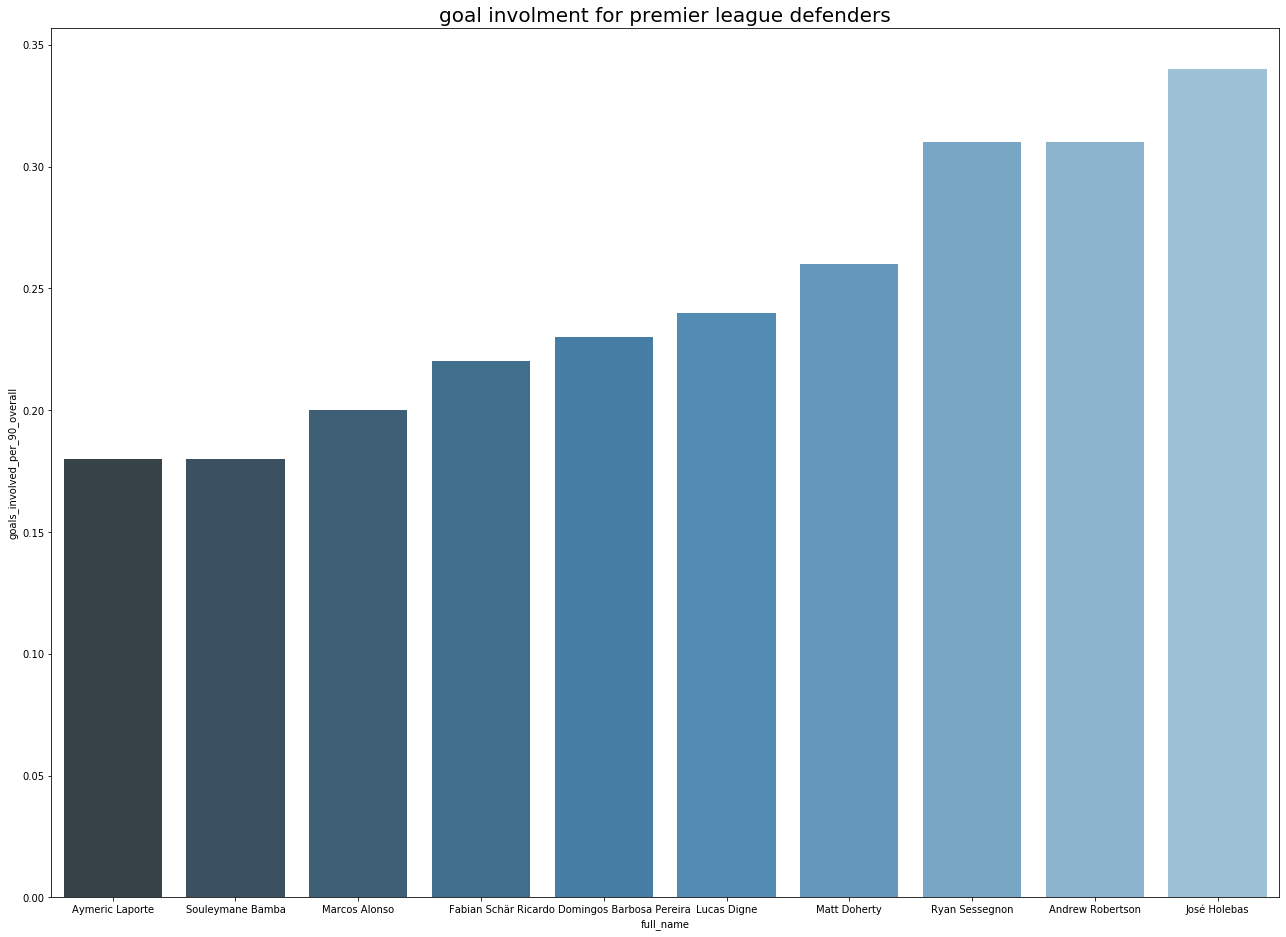

In [10]:
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="goals_involved_per_90_overall", palette="Blues_d", data=scout_chelsea, ax=ax)
plt.title('goal involment for premier league defenders', fontsize = 20);

Jose Holebas has the best goal involvment ratio per 90 minutes, the Watford defender is 35 years with a market value of £2.5M and £39,000 in weekly wages, even thou Andy Robertson is quite young at 25 years, his weekly wage is £135,000.
We suggest Ryan Sessegnon, who is third best on the list- very young at 19 years of age and commands a lower weekly wage of £38,000

####  Q2 Manchester has approached the data science team, they are looking for a player (forward/midfielder) in the top leagues that  consistently converted penalties in the 2018/2019 season?

Why is this a problem for Manchester United? Manchester United were awarded the most penalties in the 2018/2019 season (12 in total..most in the league), they scored 9 and had 3 penalties saved. The manager has deemed this "not good enough" -solution is to find a player in the top leagues that amassed more than 2500 minutes of football and has a goal involvement ratio greater than 0.5. They have stated money is not an issue as they only want the best.

In [11]:
manc = exp_data[(exp_data['position'] == 'Forward') & (exp_data['minutes_played_overall'] > 2500)
                & (exp_data['goals_involved_per_90_overall'] > 0.5) | 
                            (exp_data['position'] == 'Midfielder') & 
                           (exp_data['goals_involved_per_90_overall'] > 0.5) 
                            & (exp_data['minutes_played_overall'] > 2500)]

In [12]:
manc

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
6,Paul Pogba,26,Premier League,2018/2019,Midfielder,Manchester United,3011,1517,1494,France,...,86,502,335,0.18,35,30,0,1,250000,72500000
25,Jamie Vardy,32,Premier League,2018/2019,Forward,Leicester City,2735,1418,1317,England,...,80,547,684,0.16,9,114,0,1,135000,25000000
49,Christian Eriksen,27,Premier League,2018/2019,Midfielder,Tottenham Hotspur,2772,1457,1315,Denmark,...,79,924,231,0.10,74,9,0,4,165000,58000000
66,Ryan Fraser,25,Premier League,2018/2019,Midfielder,AFC Bournemouth,3173,1605,1568,Scotland,...,84,1587,244,0.06,95,10,0,3,76000,21500000
68,Callum Wilson,27,Premier League,2018/2019,Forward,AFC Bournemouth,2535,1324,1211,England,...,85,845,282,0.11,17,14,0,1,81000,17500000
146,Eden Hazard,28,Premier League,2018/2019,Midfielder,Chelsea,2926,1527,1399,Belgium,...,79,1463,195,0.06,18,5,0,1,470000,90000000
190,Raúl Alonso Jiménez Rodríguez,28,Premier League,2018/2019,Forward,Wolverhampton Wanderers,3125,1648,1477,Mexico,...,82,781,446,0.12,43,66,0,1,40000,11500000
216,Roberto Firmino,28,Premier League,2018/2019,Forward,Liverpool,2620,1347,1273,Brazil,...,77,0,437,0.00,32,62,0,3,180000,53500000
217,Mohamed Salah,27,Premier League,2018/2019,Forward,Liverpool,3262,1692,1570,Egypt,...,86,3262,408,0.03,7,59,0,2,240000,80500000
218,Sadio Mané,27,Premier League,2018/2019,Forward,Liverpool,3086,1643,1443,Senegal,...,86,1543,3086,0.06,4,248,0,1,230000,69500000


In [13]:
#calculating penalty conversion ratio
manc['penalty_conv_ratio'] = manc['penalty_goals']/manc['penalty_misses']

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
manc['penalty_conv_ratio'] = manc['penalty_conv_ratio'].replace(np.inf, np.nan)

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
manc.loc[manc['penalty_conv_ratio'].isnull(),'penalty_conv_ratio'] = manc['penalty_goals']

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
manc

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value,penalty_conv_ratio
6,Paul Pogba,26,Premier League,2018/2019,Midfielder,Manchester United,3011,1517,1494,France,...,502,335,0.18,35,30,0,1,250000,72500000,2.333333
25,Jamie Vardy,32,Premier League,2018/2019,Forward,Leicester City,2735,1418,1317,England,...,547,684,0.16,9,114,0,1,135000,25000000,4.000000
49,Christian Eriksen,27,Premier League,2018/2019,Midfielder,Tottenham Hotspur,2772,1457,1315,Denmark,...,924,231,0.10,74,9,0,4,165000,58000000,0.000000
66,Ryan Fraser,25,Premier League,2018/2019,Midfielder,AFC Bournemouth,3173,1605,1568,Scotland,...,1587,244,0.06,95,10,0,3,76000,21500000,0.000000
68,Callum Wilson,27,Premier League,2018/2019,Forward,AFC Bournemouth,2535,1324,1211,England,...,845,282,0.11,17,14,0,1,81000,17500000,1.000000
146,Eden Hazard,28,Premier League,2018/2019,Midfielder,Chelsea,2926,1527,1399,Belgium,...,1463,195,0.06,18,5,0,1,470000,90000000,4.000000
190,Raúl Alonso Jiménez Rodríguez,28,Premier League,2018/2019,Forward,Wolverhampton Wanderers,3125,1648,1477,Mexico,...,781,446,0.12,43,66,0,1,40000,11500000,2.000000
216,Roberto Firmino,28,Premier League,2018/2019,Forward,Liverpool,2620,1347,1273,Brazil,...,0,437,0.00,32,62,0,3,180000,53500000,1.000000
217,Mohamed Salah,27,Premier League,2018/2019,Forward,Liverpool,3262,1692,1570,Egypt,...,3262,408,0.03,7,59,0,2,240000,80500000,3.000000
218,Sadio Mané,27,Premier League,2018/2019,Forward,Liverpool,3086,1643,1443,Senegal,...,1543,3086,0.06,4,248,0,1,230000,69500000,0.000000


In [17]:
scout_manc = manc.sort_values('penalty_conv_ratio').tail(10)

In [18]:
scout_manc

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value,penalty_conv_ratio
1153,Sam Lammers,22,Eredivisie,2018/2019,Forward,Heerenveen,2692,1337,1355,Netherlands,...,897,538,0.10,25,89,0,1,15000,8500000,5.0
2368,Cristiano Ronaldo,34,Serie A,2018/2019,Forward,Juventus,2689,1414,1275,Portugal,...,896,336,0.10,5,18,0,1,410000,58500000,5.0
3006,Cristhian Stuani,33,La Liga,2018/2019,Forward,Girona FC,2731,1549,1182,Uruguay,...,303,0,0.30,6,350,0,1,16000,10000000,5.0
1134,Tammy Abraham,22,Championship,2018/2019,Forward,Aston Villa,3420,1717,1703,England,...,1140,1140,0.08,2,219,0,1,77000,15500000,6.0
3351,Bruno Miguel Borges Fernandes,25,Liga NOS,2018/2019,Midfielder,Sporting CP,2943,1440,1503,Portugal,...,327,226,0.28,12,4,-1,1,24000,49000000,6.0
578,Jay Rodriguez,30,Championship,2018/2019,Forward,West Bromwich Albion,4135,2032,2103,England,...,591,689,0.15,23,134,0,2,34000,7000000,8.0
1220,Simon Gustafson,24,Eredivisie,2018/2019,Midfielder,Utrecht,3146,1511,1635,Sweden,...,449,350,0.20,65,40,0,1,12000,4000000,8.0
2701,Fabio Quagliarella,36,Serie A,2018/2019,Forward,Sampdoria,3211,1664,1547,Italy,...,3211,401,0.03,3,38,0,1,42000,8000000,9.0
1577,Nicolas Pépé,24,Ligue 1,2018/2019,Forward,Lille,3332,1706,1626,Côte d'Ivoire,...,3332,303,0.03,9,14,0,1,97000,34500000,9.0
1183,Dušan Tadić,31,Eredivisie,2018/2019,Midfielder,Ajax,2909,1437,1472,Serbia,...,727,224,0.12,3,10,0,1,39000,30000000,11.0


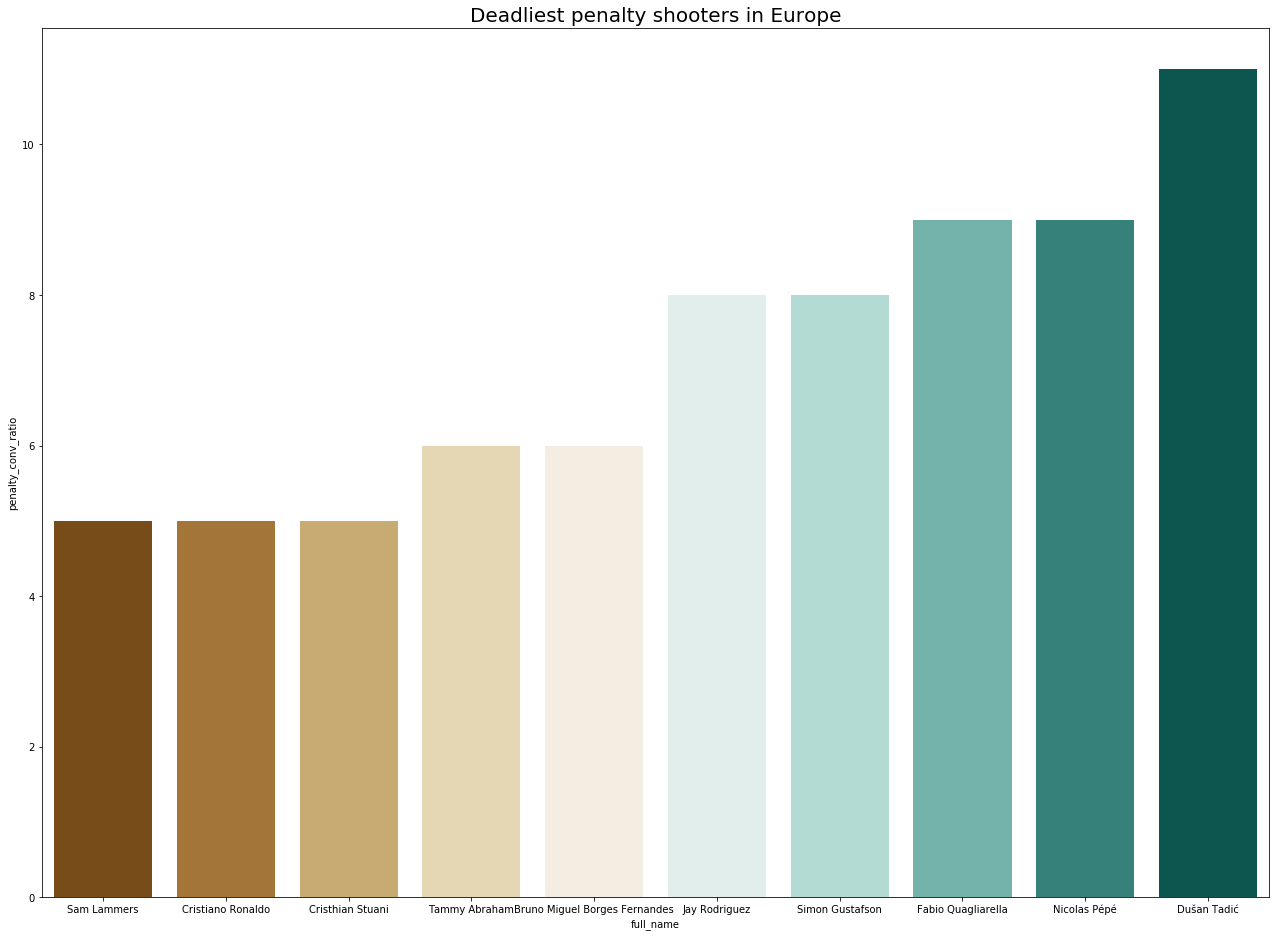

In [19]:
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="penalty_conv_ratio", palette="BrBG", data=scout_manc, ax=ax)
plt.title('Deadliest penalty shooters in Europe', fontsize = 20);

I would recommend Bruno Fernandes of Sporting CP to Manchester United as he has the sixth best penalty conversion rate, he is 25 years of age and has a higher goal involvement ratio than Simon Gustafson of Utrecht in fourth and he is also cheaper in terms of weekly wages and 6 years younger than Dusan Tudic in first place.
Although Nicolas Pepe is younger, he commands a higher weekly wage at £97,000 and lower goal_involvment ratio at 0.89.

#### Q3. Atletico Madrid club in the spanish league has approached the data science team- with their tight transfer budget, they asked us to find and suggest a forward in premier league that has the highest ratio of goals/market value

This is a classic case of return on investment, and it is a very valid proposal- essentially saying----get us the striker that is worth his weight in gold.

In [20]:
striker_data = exp_data[(exp_data['position'] == 'Forward') & (exp_data['minutes_played_overall'] > 2000)& (exp_data['league'] == 'Premier League')]
                             
                         

In [21]:
striker_data

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
9,Marcus Rashford,22,Premier League,2018/2019,Forward,Manchester United,2362,1293,1069,England,...,72,472,394,0.19,40,49,0,3,120000,35500000
10,Romelu Lukaku,26,Premier League,2018/2019,Forward,Manchester United,2130,982,1148,Belgium,...,67,533,0,0.17,16,280,0,2,115000,46000000
25,Jamie Vardy,32,Premier League,2018/2019,Forward,Leicester City,2735,1418,1317,England,...,80,547,684,0.16,9,114,0,1,135000,25000000
39,Ayoze Perez,26,Premier League,2018/2019,Forward,Newcastle United,2929,1526,1403,Spain,...,79,1465,1465,0.06,45,196,0,1,76000,18000000
53,Harry Kane,26,Premier League,2018/2019,Forward,Tottenham Hotspur,2427,1066,1361,England,...,87,485,607,0.19,5,95,0,1,220000,83000000
54,Heung-Min Son,27,Premier League,2018/2019,Forward,Tottenham Hotspur,2048,1161,887,South Korea,...,66,512,341,0.18,14,37,0,2,165000,54000000
67,David Brooks,22,Premier League,2018/2019,Forward,AFC Bournemouth,2278,1289,989,England,...,76,759,456,0.12,68,63,0,4,44000,13000000
68,Callum Wilson,27,Premier League,2018/2019,Forward,AFC Bournemouth,2535,1324,1211,England,...,85,845,282,0.11,17,14,0,1,81000,17500000
69,Joshua King,27,Premier League,2018/2019,Forward,AFC Bournemouth,2974,1563,1411,Norway,...,85,991,991,0.09,47,165,0,2,77000,15000000
99,Aleksandar Mitrović,25,Premier League,2018/2019,Forward,Fulham,3282,1616,1666,Serbia,...,89,469,1094,0.19,65,171,0,1,46000,13500000


In [22]:
striker_data['roi'] = striker_data['goals_overall'] / (striker_data['market_value'])

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
striker_data.head()

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value,roi
9,Marcus Rashford,22,Premier League,2018/2019,Forward,Manchester United,2362,1293,1069,England,...,472,394,0.19,40,49,0,3,120000,35500000,2.816901e-07
10,Romelu Lukaku,26,Premier League,2018/2019,Forward,Manchester United,2130,982,1148,Belgium,...,533,0,0.17,16,280,0,2,115000,46000000,2.608696e-07
25,Jamie Vardy,32,Premier League,2018/2019,Forward,Leicester City,2735,1418,1317,England,...,547,684,0.16,9,114,0,1,135000,25000000,7.200000e-07
39,Ayoze Perez,26,Premier League,2018/2019,Forward,Newcastle United,2929,1526,1403,Spain,...,1465,1465,0.06,45,196,0,1,76000,18000000,6.666667e-07
53,Harry Kane,26,Premier League,2018/2019,Forward,Tottenham Hotspur,2427,1066,1361,England,...,485,607,0.19,5,95,0,1,220000,83000000,2.048193e-07


In [24]:
scout_atletico = striker_data.sort_values('roi').tail(10)

In [25]:
scout_atletico

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value,roi
3409,Richarlison de Andrade,22,Premier League,2018/2019,Forward,Everton,2679,1283,1396,Brazil,...,383,2679,0.24,28,252,-1,1,65000,17000000,7.647059e-07
69,Joshua King,27,Premier League,2018/2019,Forward,AFC Bournemouth,2974,1563,1411,Norway,...,991,991,0.09,47,165,0,2,77000,15000000,8.000000e-07
68,Callum Wilson,27,Premier League,2018/2019,Forward,AFC Bournemouth,2535,1324,1211,England,...,845,282,0.11,17,14,0,1,81000,17500000,8.000000e-07
99,Aleksandar Mitrović,25,Premier League,2018/2019,Forward,Fulham,3282,1616,1666,Serbia,...,469,1094,0.19,65,171,0,1,46000,13500000,8.148148e-07
3395,Rondon,30,Premier League,2018/2019,Forward,Newcastle United,2609,1343,1266,Venezuela,...,2609,373,0.03,38,45,-1,2,18000,12500000,8.800000e-07
268,Chris Wood,28,Premier League,2018/2019,Forward,Burnley,2582,1330,1252,New Zealand,...,1291,1291,0.07,49,186,0,2,42000,11000000,9.090909e-07
161,Troy Deeney,31,Premier League,2018/2019,Forward,Watford,2548,1298,1250,England,...,425,510,0.21,54,74,0,2,69000,9500000,9.473684e-07
190,Raúl Alonso Jiménez Rodríguez,28,Premier League,2018/2019,Forward,Wolverhampton Wanderers,3125,1648,1477,Mexico,...,781,446,0.12,43,66,0,1,40000,11500000,1.130435e-06
270,Ashley Barnes,30,Premier League,2018/2019,Forward,Burnley,2400,1307,1093,Austria,...,300,1200,0.30,27,175,0,1,44000,10500000,1.142857e-06
177,Glenn Murray,36,Premier League,2018/2019,Forward,Brighton & Hove Albion,2514,1384,1130,England,...,503,2514,0.18,21,229,0,1,39000,4100000,3.170732e-06


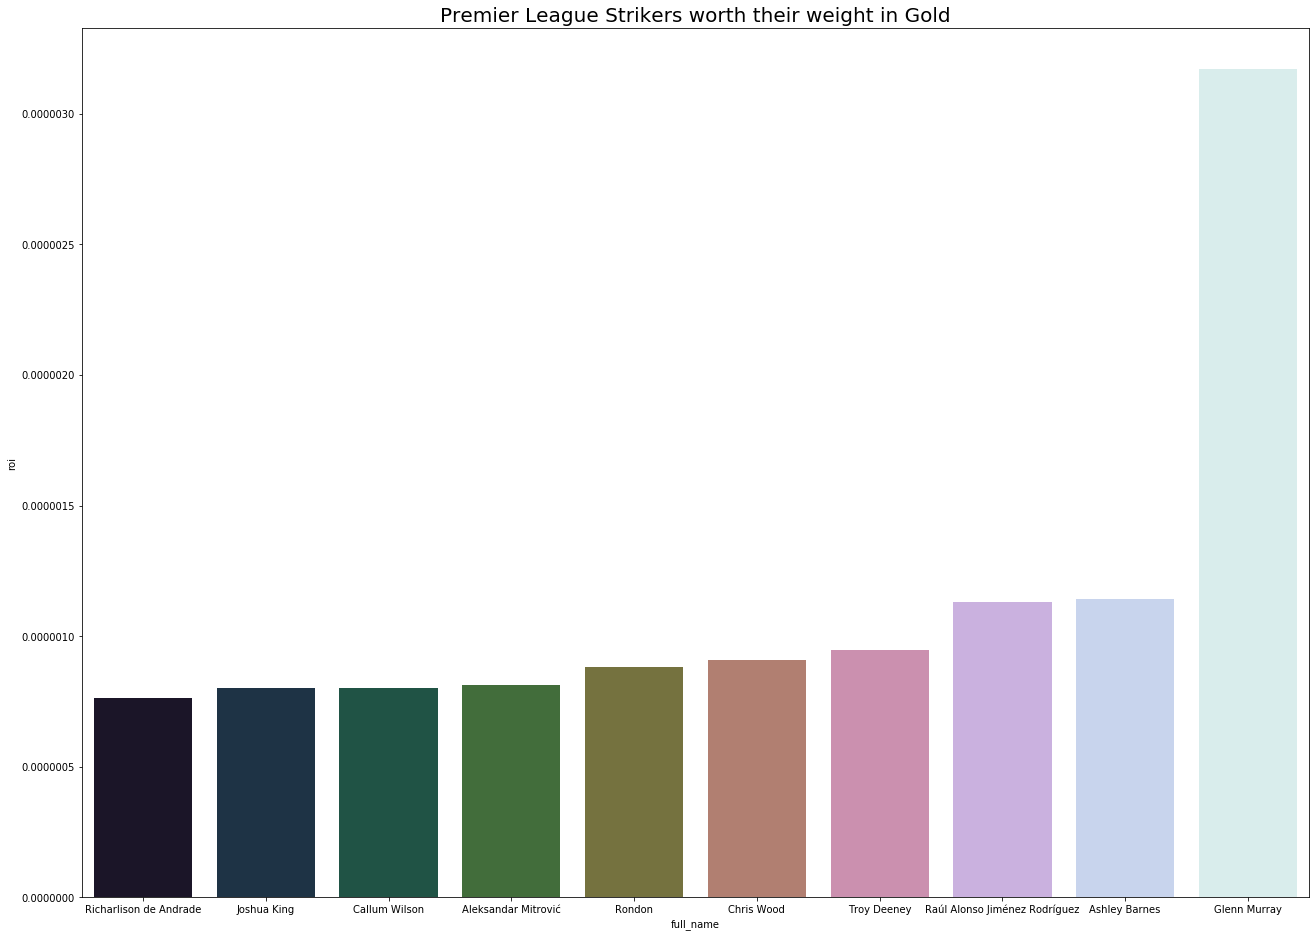

In [26]:
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="roi", palette="cubehelix", data=scout_atletico, ax=ax)
plt.title('Premier League Strikers worth their weight in Gold', fontsize = 20);

Brighton striker Glenn Murray, last season's performances in terms of goals compared to his market value is the best in the whole of the premier league but at 36, he might not represent a good return on investment in the long term in terms of resale value.
We as Data Scientist suggest Callum Wilson, although he is 5 years older than Richarlison who is the youngest in the group. He has more more goals and assists than any player in the top 10, difference of 0.20 goal involvment ratio than second on the list Solomon Random. He also comes in tied second youngest on the list, which means more years to play at the top level before retirement.

#### Q4. Brighton and Southampton were 2 and 3 points from being relegated to the championship last season. They have tasked us with looking for a striker and a defender in the championship that can boost their performance in the upcoming season

It is necessary these two team get some good reinforcements that can prevent the struggles of last season. The first point of call is getting a striker to put the ball in the back of the net and defender to stop leaking of goals. These small teams don't have the transfer budgets of big clubs hence they have specifically asked for championship top performers.

In [27]:
champ_def = exp_data[(exp_data['league'] == 'Championship') & (exp_data['position'] == 'Defender')
                     & (exp_data['minutes_played_overall'] > 1500) 
                     & (exp_data['clean_sheets_overall'] > 10)] 

In [28]:
champ_def

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
501,Michael Hector,27,Championship,2018/2019,Defender,Sheffield Wednesday,3242,1622,1620,Jamaica,...,88,811,0,0.11,276,393,44,9,53000,3300000
544,Tendayi Darikwa,27,Championship,2018/2019,Defender,Nottingham Forest,2513,1170,1343,England,...,90,503,2513,0.18,461,314,38,17,24000,2100000
561,George Friend,32,Championship,2018/2019,Defender,Middlesbrough,3271,1648,1623,England,...,86,818,1636,0.11,283,266,21,9,20000,1700000
566,Ryan Shawcross,32,Championship,2018/2019,Defender,Stoke City,2937,1710,1227,England,...,82,490,0,0.18,336,529,64,11,22000,2300000
592,Daniel Sanchez Ayala,29,Championship,2018/2019,Defender,Middlesbrough,2722,1352,1370,Spain,...,82,194,0,0.46,321,506,14,11,50000,525000
596,Adam Reach,26,Championship,2018/2019,Defender,Sheffield Wednesday,3674,1978,1696,England,...,87,1837,525,0.05,119,96,83,3,25000,4700000
622,Thomas Edwards,20,Championship,2018/2019,Defender,Stoke City,1935,801,1134,England,...,72,387,0,0.23,288,536,29,16,7000,1200000
678,Fikayo Tomori,21,Championship,2018/2019,Defender,Derby County,4062,2070,1992,England,...,86,508,4062,0.18,344,338,99,16,53000,11500000
710,Ryan Shotton,31,Championship,2018/2019,Defender,Middlesbrough,2877,1399,1478,England,...,85,480,2877,0.19,424,317,20,20,20000,1900000
716,Barry Douglas,30,Championship,2018/2019,Defender,Leeds United,1984,976,1008,Scotland,...,73,248,397,0.36,413,49,39,26,39000,2600000


In [29]:
scout_champ_def = champ_def.sort_values('conceded_per_90_overall').head(10)

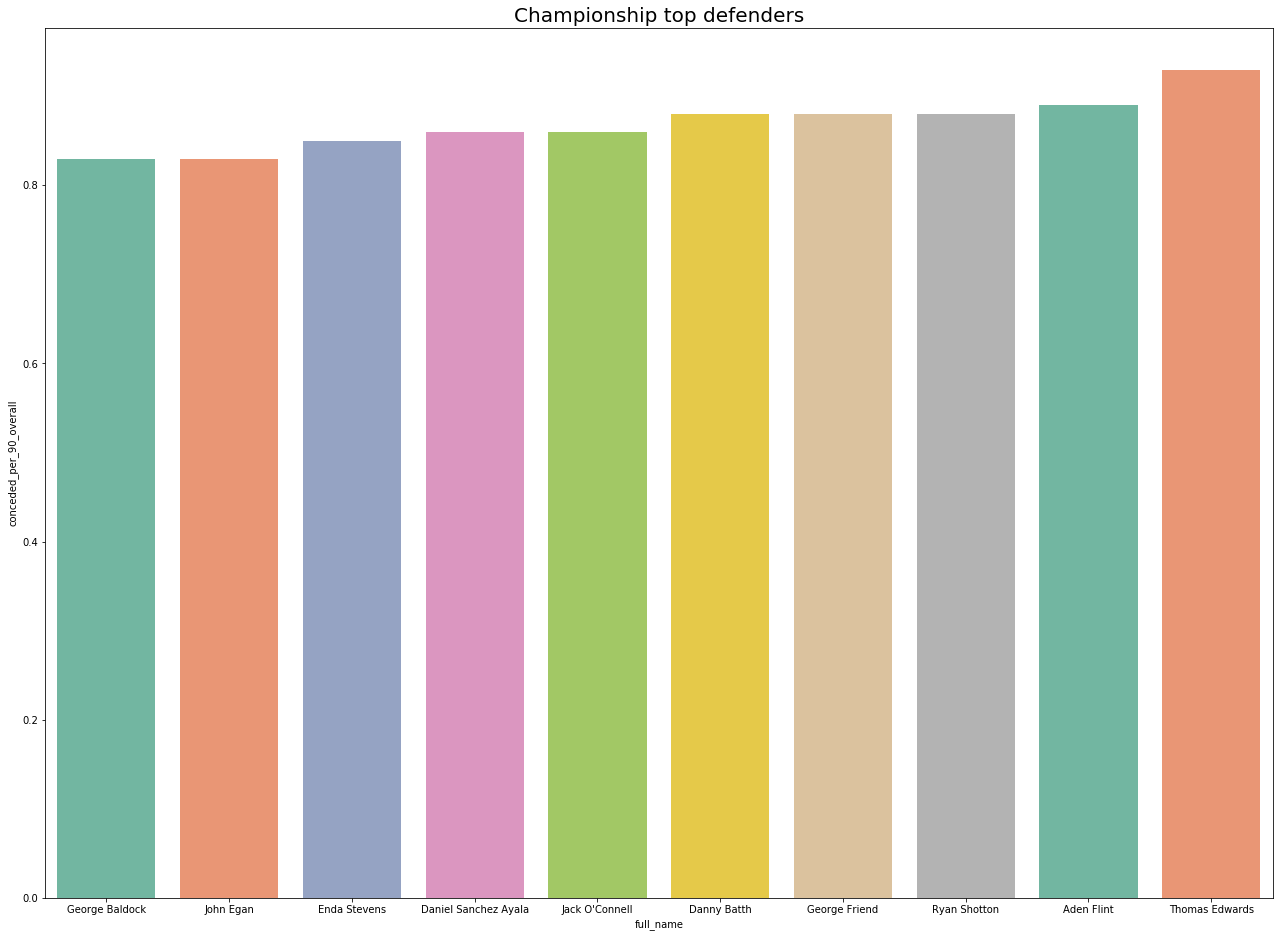

In [30]:
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="conceded_per_90_overall", palette="Set2", data=scout_champ_def, ax=ax)
plt.title('Championship top defenders', fontsize = 20);

George Baldock, John Egan and Enda Stevens are all Sheffield United defenders and they had the least amount of goals conceded for every 90 minutes they were on the pitch. 
We suggest a bid for George Baldock would be the best option, he is 26 and cheapest out of the first four options in terms of weekly wages at £25,000 and he is worth a market_value of £4.2M

In [31]:
champ_fwd = exp_data[(exp_data['league'] == 'Championship') & (exp_data['position'] == 'Forward')
                     & (exp_data['minutes_played_overall'] > 1500) 
                     & (exp_data['goals_overall'] > 10)] 

In [32]:
champ_fwd

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
524,Teemu Pukki,29,Championship,2018/2019,Forward,Norwich City,3828,1867,1961,Finland,...,89,1914,425,0.05,4,64,0,1,53000,9000000
531,Jarrod Bowen,22,Championship,2018/2019,Forward,Hull City,3953,2050,1903,England,...,86,3953,988,0.02,21,193,0,1,14000,11000000
543,Lukas Jutkiewicz,30,Championship,2018/2019,Forward,Birmingham City,3824,1956,1868,England,...,83,956,382,0.09,61,45,0,2,13000,3000000
578,Jay Rodriguez,30,Championship,2018/2019,Forward,West Bromwich Albion,4135,2032,2103,England,...,88,591,689,0.15,23,134,0,2,34000,7000000
585,Lewis Grabban,31,Championship,2018/2019,Forward,Nottingham Forest,2731,1428,1303,England,...,70,910,910,0.10,19,183,0,1,37000,3600000
595,Oliver McBurnie,23,Championship,2018/2019,Forward,Swansea City,3414,1820,1594,Scotland,...,81,683,854,0.13,11,152,0,1,29000,8000000
606,Fraizer Campbell,32,Championship,2018/2019,Forward,Hull City,2589,1235,1354,England,...,66,370,432,0.24,32,62,0,2,20000,1600000
649,Dwight Gayle,29,Championship,2018/2019,Forward,West Bromwich Albion,2934,1502,1432,England,...,73,734,1467,0.12,1,254,0,1,40000,7000000
650,Steven Fletcher,32,Championship,2018/2019,Forward,Sheffield Wednesday,2537,1426,1111,Scotland,...,63,846,1269,0.11,43,224,0,1,20000,1900000
652,Danny Graham,34,Championship,2018/2019,Forward,Blackburn Rovers,3031,1730,1301,England,...,70,3031,758,0.03,27,138,0,2,12000,650000


In [33]:
scout_champ_fwd = champ_fwd.sort_values('goals_involved_per_90_overall').tail(10)

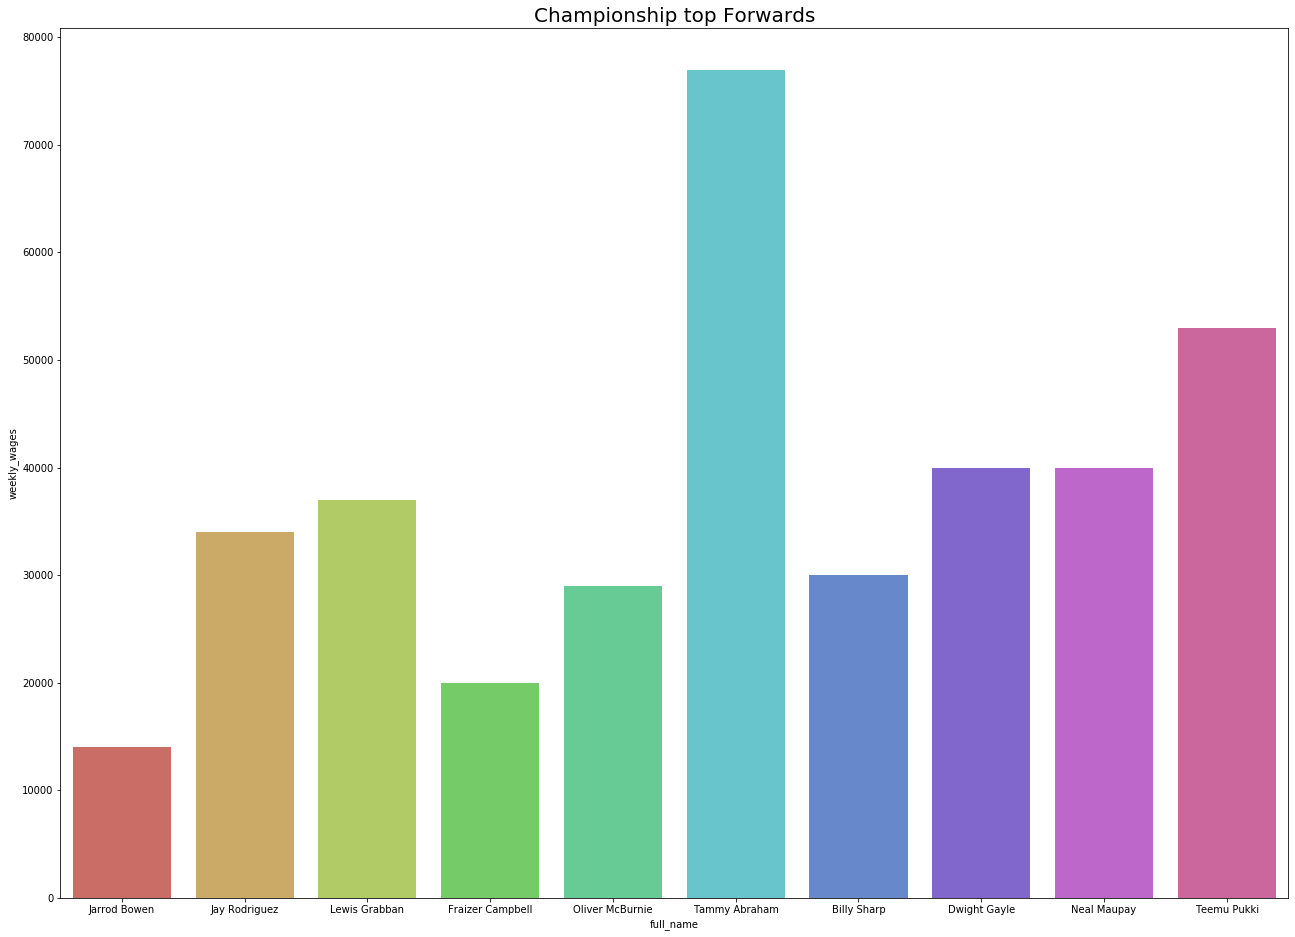

In [34]:
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x="full_name", y="weekly_wages", palette="hls", data=scout_champ_fwd, ax=ax)
plt.title('Championship top Forwards', fontsize = 20);

Norwich striker Teemu Pukki is the highest performing forward in the championship ahead of Neal Maupay and big name forward "Tammy Abraham", We suggest Neal Maupay as an ideal buy, one year older than Tammy Abraham, six years and ten years younger than Dwight Gayle and Billy Sharp respectively with a weekly wage demand of £40,000 which is £37,000 cheaper than Tammy Abraham.

#### Q5. AS ROMA, an Italian football club approached the data science team and would very much like to plan for the future in their goalkeeping department, having shipped in 48 goals last season in the SERIE A. They plan on delving into the european transfer market to get the best goalkeeper under the age of 25.

In [35]:
roma_gk = exp_data[(exp_data['position'] == 'Goalkeeper') & (exp_data['age'] <= 25)
                  & (exp_data['clean_sheets_overall'] >= 10)]

In [36]:
roma_gk

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
196,Jordan Pickford,25,Premier League,2018/2019,Goalkeeper,Everton,3420,1710,1710,England,...,90,3420,0,0.03,409,353,57,14,78000,24000000
731,David Raya Martin,24,Championship,2018/2019,Goalkeeper,Blackburn Rovers,3690,1800,1890,Spain,...,90,3690,3690,0.02,476,340,155,18,14000,350000
893,Bailey Peacock-Farrell,23,Championship,2018/2019,Goalkeeper,Leeds United,2520,1260,1260,England,...,90,2520,0,0.04,541,520,59,19,10000,1300000
902,Joe Lumley,24,Championship,2018/2019,Goalkeeper,Queens Park Rangers,3780,1890,1890,England,...,90,1890,0,0.05,441,452,105,22,3000,925000
981,Dean Henderson,22,Championship,2018/2019,Goalkeeper,Sheffield United,4140,2070,2070,England,...,90,0,4140,0.00,531,339,8,22,20000,8500000
1177,André Onana Onana,23,Eredivisie,2018/2019,Goalkeeper,Ajax,2921,1440,1481,Cameroon,...,89,974,0,0.09,276,276,9,19,22000,30000000
1596,Mike Maignan,24,Ligue 1,2018/2019,Goalkeeper,Lille,3420,1710,1710,France,...,90,3420,0,0.03,332,420,15,15,28000,16000000
1649,Paul Bernardoni,22,Ligue 1,2018/2019,Goalkeeper,Nîmes,3420,1710,1710,France,...,90,0,0,0.00,362,389,130,15,15000,9500000
2380,Thomas Strakosha,24,Serie A,2018/2019,Goalkeeper,Lazio,3150,1620,1530,Albania,...,90,788,0,0.11,338,358,46,20,40000,22000000
2617,Gianluigi Donnarumma,20,Serie A,2018/2019,Goalkeeper,AC Milan,3092,1541,1551,Italy,...,86,773,0,0.12,409,394,23,23,34000,41500000


In [37]:
scout_roma_gk = roma_gk.sort_values('conceded_per_90_overall').head(10)

In [38]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
scout_roma_gk

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
1596,Mike Maignan,24,Ligue 1,2018/2019,Goalkeeper,Lille,3420,1710,1710,France,38,19,19,0,0,0,0,0,0,0,0,15,10,5,28,10,18,1,0,0.00,0.00,0.0,0.0,0.0,0,0.74,122,90,3420,0,0.03,332,420,15,15,28000,16000000
2617,Gianluigi Donnarumma,20,Serie A,2018/2019,Goalkeeper,AC Milan,3092,1541,1551,Italy,36,18,18,0,0,0,0,0,0,0,0,11,6,5,28,15,13,4,0,0.00,0.00,0.0,0.0,0.0,0,0.82,110,86,773,0,0.12,409,394,23,23,34000,41500000
981,Dean Henderson,22,Championship,2018/2019,Goalkeeper,Sheffield United,4140,2070,2070,England,46,23,23,0,0,0,1,1,0,0,0,21,12,9,38,16,22,0,0,0.02,0.02,0.0,0.0,0.0,0,0.83,109,90,0,4140,0.00,531,339,8,22,20000,8500000
1177,André Onana Onana,23,Eredivisie,2018/2019,Goalkeeper,Ajax,2921,1440,1481,Cameroon,33,16,17,0,0,0,0,0,0,0,0,15,9,6,27,9,18,3,0,0.00,0.00,0.0,0.0,0.0,0,0.83,108,89,974,0,0.09,276,276,9,19,22000,30000000
2823,Odisseas Vlachodimos,25,Liga NOS,2018/2019,Goalkeeper,Benfica,3055,1530,1525,Germany,34,17,17,0,0,0,0,0,0,0,0,15,7,8,29,17,12,3,1,0.00,0.00,0.0,0.0,0.0,0,0.85,105,90,764,0,0.12,395,272,18,16,14000,17500000
2380,Thomas Strakosha,24,Serie A,2018/2019,Goalkeeper,Lazio,3150,1620,1530,Albania,35,18,17,0,0,0,0,0,0,0,0,10,5,5,36,20,16,4,0,0.00,0.00,0.0,0.0,0.0,0,1.03,88,90,788,0,0.11,338,358,46,20,40000,22000000
893,Bailey Peacock-Farrell,23,Championship,2018/2019,Goalkeeper,Leeds United,2520,1260,1260,England,28,14,14,0,0,0,0,0,0,0,0,10,6,4,31,11,20,1,0,0.00,0.00,0.0,0.0,0.0,0,1.11,81,90,2520,0,0.04,541,520,59,19,10000,1300000
196,Jordan Pickford,25,Premier League,2018/2019,Goalkeeper,Everton,3420,1710,1710,England,38,19,19,0,0,0,0,0,0,0,0,14,9,5,44,20,24,1,0,0.00,0.00,0.0,0.0,0.0,0,1.16,78,90,3420,0,0.03,409,353,57,14,78000,24000000
902,Joe Lumley,24,Championship,2018/2019,Goalkeeper,Queens Park Rangers,3780,1890,1890,England,42,21,21,0,0,0,0,0,0,0,0,14,9,5,52,24,28,2,0,0.00,0.00,0.0,0.0,0.0,0,1.24,73,90,1890,0,0.05,441,452,105,22,3000,925000
2693,Emil Audero Mulyadi,22,Serie A,2018/2019,Goalkeeper,Sampdoria,3240,1620,1620,Italy,36,18,18,0,0,0,0,0,0,0,0,11,8,3,45,15,30,4,0,0.00,0.00,0.0,0.0,0.0,0,1.25,72,90,810,0,0.11,286,305,78,16,22000,11500000


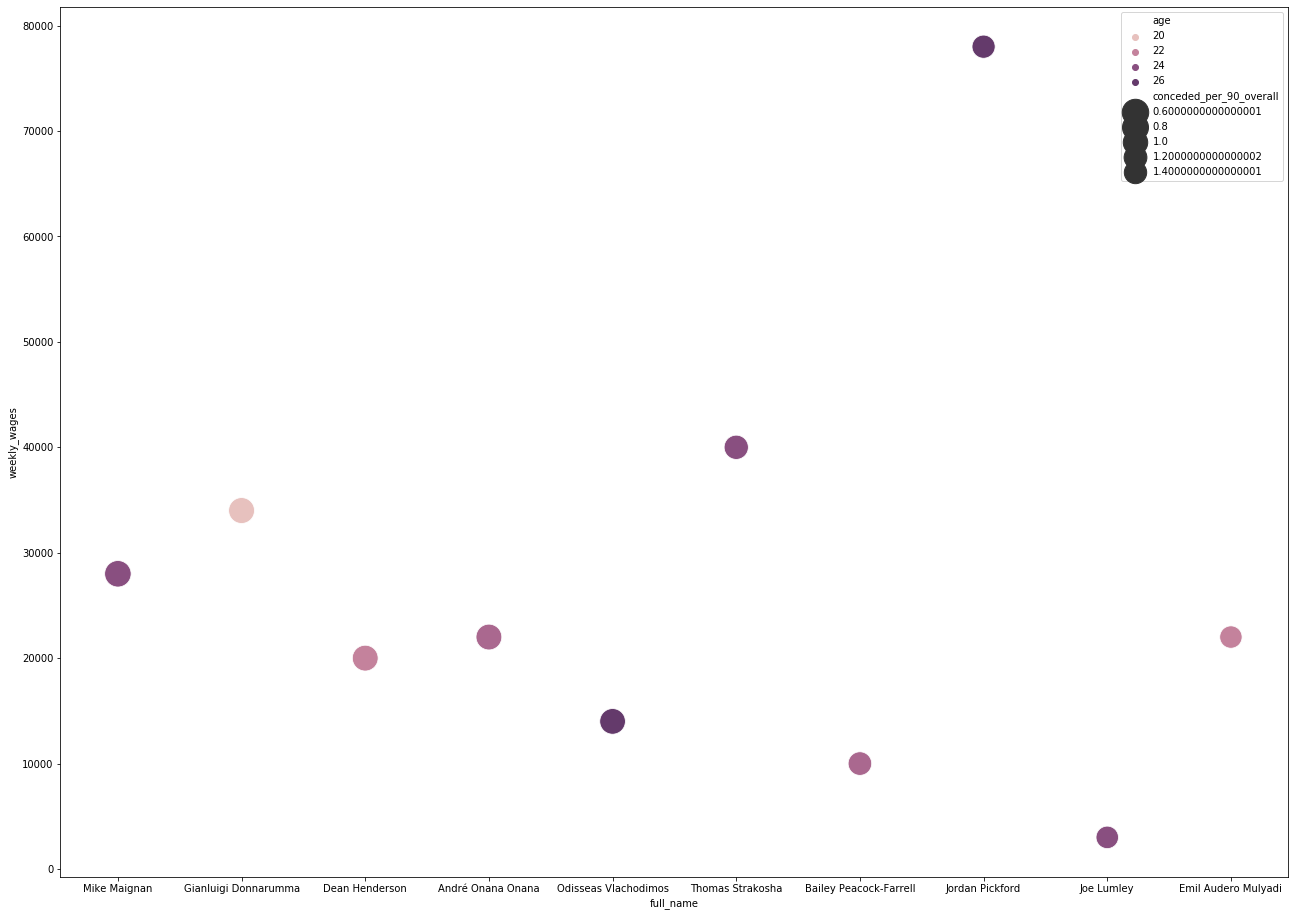

In [49]:
shape = (22, 16)
fig, ax = plt.subplots(figsize = shape)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="full_name", y="weekly_wages",
                     hue="age", size="conceded_per_90_overall",
                     palette=cmap, sizes=(700, 500),
                     data=scout_roma_gk)

I would recommed FC Lille goalkeeper Mike Maignan to AS Roma, He is exactly the kind of goalkeeper they are looking for, with his wages at £28,000 and age at 24. He has the lowest goals conceded for every 90 minutes.